## week0_09 practice: PyTorch practice, hints and Dataloaders

Credits:
* First part is based on YSDA [Practical RL course week04 materials](https://github.com/yandexdataschool/Practical_RL/tree/master/week04_%5Brecap%5D_deep_learning).
* Second part is based on PyTorch official tutorials and [this kaggle kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)
* Third part is based on PyTorch tutorial by [Stanford CS 231n course](http://cs231n.stanford.edu)

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will remind you how to use pytorch low and high-level core. You can install it [here](http://pytorch.org/).

__Pytorch feels__ differently than other frameworks (like tensorflow/theano) on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

Let's dive into it!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms

### Task 1: Tensormancy

__1.1 The [_disclaimer_](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)__

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (6 \cdot \theta) ) \cdot (1 + 0.01 \cdot cos(24 \cdot \theta)) \cdot (0.5 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (10 + sin(10 \cdot \theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

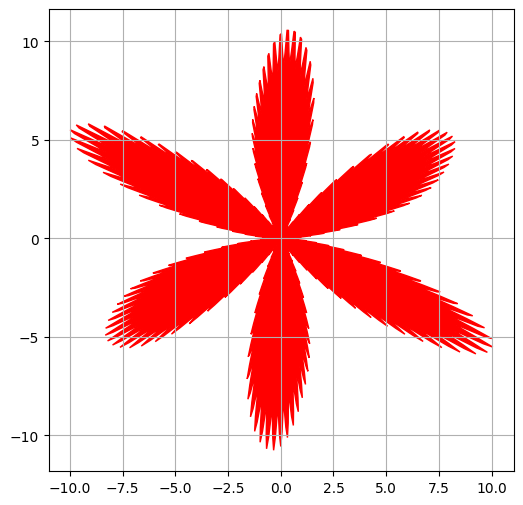

In [2]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + 0.9 * torch.cos(6 * theta)) \
 * (1 + 0.01 * torch.cos(24 * theta)) \
 * (0.5 + 0.05 * torch.cos(200 * theta)) \
 * (10 + torch.sin(10 * theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = torch.sin(theta) * rho
y = torch.cos(theta) * rho


plt.figure(figsize=(6, 6))
plt.fill(x.numpy(), y.numpy(), color='red')
plt.grid()

### Task 2: Using the Dataloader

In [3]:
from torch import nn
from torch.nn import functional as F

In [4]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s20/week0_09_Optimization_and_Regularization_in_DL/notmnist.py -nc
# !wget https://raw.githubusercontent.com/girafe-ai/ml-cours/week0_09_DL_step_2/notmnist.py -nc

!wget https://raw.githubusercontent.com/girafe-ai/ml-course/old_master/week0_09_DL_step_2/notmnist.py -nc

--2023-07-04 05:42:23--  https://raw.githubusercontent.com/girafe-ai/ml-course/old_master/week0_09_DL_step_2/notmnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1799 (1.8K) [text/plain]
Saving to: ‘notmnist.py’

notmnist.py         100%[===================>]   1.76K  --.-KB/s    in 0s      

2023-07-04 05:42:23 (22.5 MB/s) - ‘notmnist.py’ saved [1799/1799]



In [5]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist()

Extracting ...
Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [6]:
class DatasetMNIST(Dataset):
    def __init__(self, path='./notMNIST_small', letters='ABCDEFGHIJ', transform=None):
        self.data, self.labels, _ ,_  = load_notmnist(path=path, letters=letters, test_size=0)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.data[index].transpose(1, 2, 0)
        label = self.labels[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [7]:
full_dataset = DatasetMNIST('./notMNIST_small', 'AB', transform=None)

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [8]:
# we can access and get data with index by __getitem__(index)
img, lab = full_dataset.__getitem__(0)

print(img.shape)
print(type(img))

(28, 28, 1)
<class 'numpy.ndarray'>


In [9]:
a = torchvision.transforms.ToTensor()

a(img).shape

torch.Size([1, 28, 28])

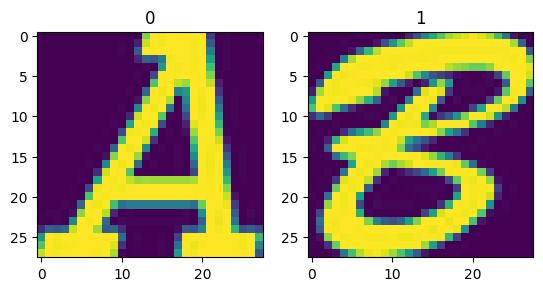

In [10]:
inds = np.random.randint(len(full_dataset), size=2)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(full_dataset[inds[i]][0].reshape([28,28]))
    plt.title(str(full_dataset[inds[i]][1]))

#### To the DataLoader

In [11]:
train_loader = DataLoader(full_dataset, batch_size=8, shuffle=True)

We can use dataloader as iterator by using iter() function.

In [12]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


We can look at images and labels of batch size by extracting data `.next()` method.

In [13]:
images, labels = next(train_iter)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

images shape on batch size = torch.Size([8, 28, 28, 1])
labels shape on batch size = torch.Size([8])


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


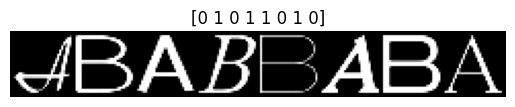

In [14]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images.permute([0, 3, 1, 2]))

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

And now with transformations:

In [15]:
train_dataset_with_transform = DatasetMNIST(
    transform=torchvision.transforms.ToTensor()
)

Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [16]:
img, lab = train_dataset_with_transform.__getitem__(0)

print('image shape at the first row : {}'.format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [17]:
train_loader_tr = DataLoader(train_dataset_with_transform, batch_size=8, shuffle=True)

train_iter_tr = iter(train_loader_tr)
print(type(train_iter_tr))

images, labels = next(train_iter_tr)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


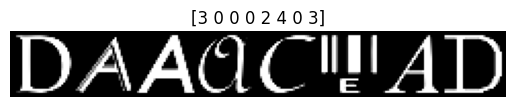

In [18]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

### Composing several transformations

If you want to take data augmentation, you have to make List using `torchvision.transforms.Compose`

```
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```


this function can convert some image by order within `__call__` method.

In [19]:
class Flatten():
    def __call__(self, pic):
        return pic.flatten()

    def __repr__(self):
        return self.__class__.__name__ + '()'

In [20]:
a = Flatten()

In [21]:
a(img).shape

torch.Size([784])

In [26]:
new_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    Flatten()
])

# Putting all together

In [27]:
import time

from IPython.display import clear_output

In [28]:
# use GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [29]:
def subset_ind(dataset, ratio: float):
#     return ### YOUR CODE HERE
    return np.random.choice(len(dataset), size=int(ratio*len(dataset)), replace=False)

In [30]:
dataset = DatasetMNIST(
    './notMNIST_small',
#     'AB',
    transform=new_transform
)

shrink_inds = subset_ind(dataset, 0.2)
dataset = Subset(dataset, shrink_inds)

print(f'\n\n dataset size: {len(dataset)}, labels: {np.unique(dataset.dataset.labels)}')

Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


 dataset size: 3744, labels: [0 1 2 3 4 5 6 7 8 9]


In [31]:
val_size = 0.2
val_inds = subset_ind(dataset, val_size)

train_dataset = Subset(dataset, [i for i in range(len(dataset)) if i not in val_inds])
val_dataset = Subset(dataset, val_inds)

print(f'  training size: {len(train_dataset)}\nvalidation size: {len(val_dataset)}')

  training size: 2996
validation size: 748


In [32]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [33]:
train_iter = iter(train_loader)
print(type(train_iter))

images, labels = next(train_iter)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([32, 784])
labels shape on batch size = torch.Size([32])


In [34]:
loss_func = nn.CrossEntropyLoss()

In [35]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 10),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [36]:
from torchsummary import summary
summary(model, (784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [37]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []

    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            ### YOUR CODE HERE
            opt.zero_grad()

            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            pred = model(X_batch)
            loss = loss_fn(pred, y_batch)

            loss.backward()
            opt.step()



            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            ### YOUR CODE HERE
            ep_train_loss.append(loss.item())

        model.train(False) # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                ### YOUR CODE HERE
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                pred = model(X_batch)
                loss = loss_fn(pred, y_batch)

                ### YOUR CODE HERE
                ep_val_loss.append(loss.item())
                y_pred = pred.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy()))

        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [38]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

Epoch 1 of 30 took 0.186s
	  training loss: 0.769004
	validation loss: 0.481350
	validation accuracy: 0.860
Epoch 2 of 30 took 0.148s
	  training loss: 0.469114
	validation loss: 0.442651
	validation accuracy: 0.872
Epoch 3 of 30 took 0.160s
	  training loss: 0.415508
	validation loss: 0.423176
	validation accuracy: 0.877
Epoch 4 of 30 took 0.156s
	  training loss: 0.374030
	validation loss: 0.413801
	validation accuracy: 0.875
Epoch 5 of 30 took 0.176s
	  training loss: 0.348608
	validation loss: 0.440219
	validation accuracy: 0.867
Epoch 6 of 30 took 0.183s
	  training loss: 0.321519
	validation loss: 0.421252
	validation accuracy: 0.879
Epoch 7 of 30 took 0.182s
	  training loss: 0.303176
	validation loss: 0.432640
	validation accuracy: 0.863
Epoch 8 of 30 took 0.196s
	  training loss: 0.284188
	validation loss: 0.444779
	validation accuracy: 0.859
Epoch 9 of 30 took 0.154s
	  training loss: 0.270398
	validation loss: 0.427100
	validation accuracy: 0.880
Epoch 10 of 30 took 0.156s
	

In [39]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)

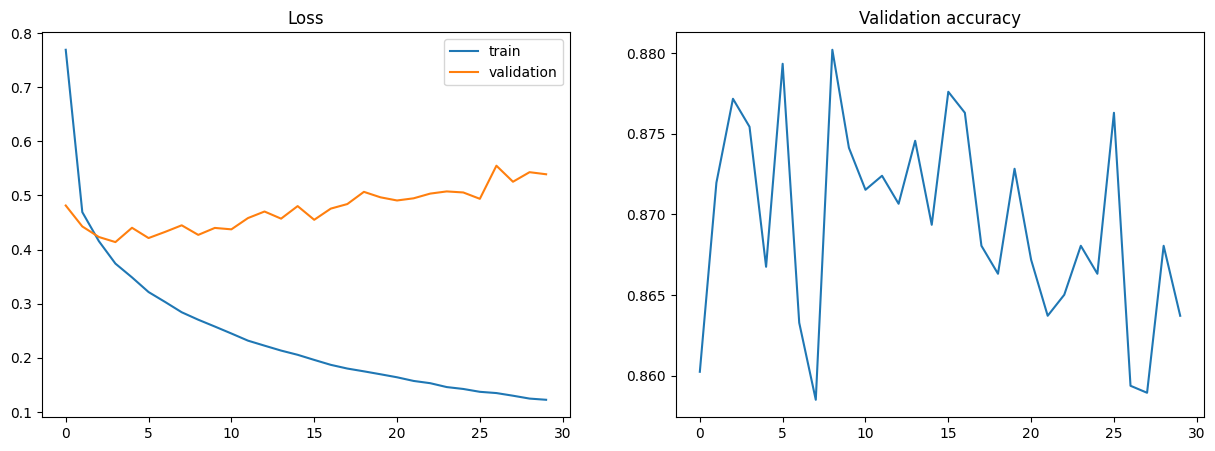

In [40]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Real network

In [41]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10),

)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [42]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

Epoch 1 of 30 took 1.263s
	  training loss: 0.651809
	validation loss: 0.409239
	validation accuracy: 0.870
Epoch 2 of 30 took 0.605s
	  training loss: 0.317172
	validation loss: 0.380331
	validation accuracy: 0.888
Epoch 3 of 30 took 0.553s
	  training loss: 0.227121
	validation loss: 0.375270
	validation accuracy: 0.888
Epoch 4 of 30 took 0.538s
	  training loss: 0.154374
	validation loss: 0.444477
	validation accuracy: 0.885
Epoch 5 of 30 took 0.529s
	  training loss: 0.141461
	validation loss: 0.427171
	validation accuracy: 0.895
Epoch 6 of 30 took 0.526s
	  training loss: 0.092282
	validation loss: 0.472494
	validation accuracy: 0.889
Epoch 7 of 30 took 0.520s
	  training loss: 0.075921
	validation loss: 0.538382
	validation accuracy: 0.883
Epoch 8 of 30 took 0.520s
	  training loss: 0.066254
	validation loss: 0.502428
	validation accuracy: 0.898
Epoch 9 of 30 took 0.752s
	  training loss: 0.032921
	validation loss: 0.592823
	validation accuracy: 0.895
Epoch 10 of 30 took 0.765s
	

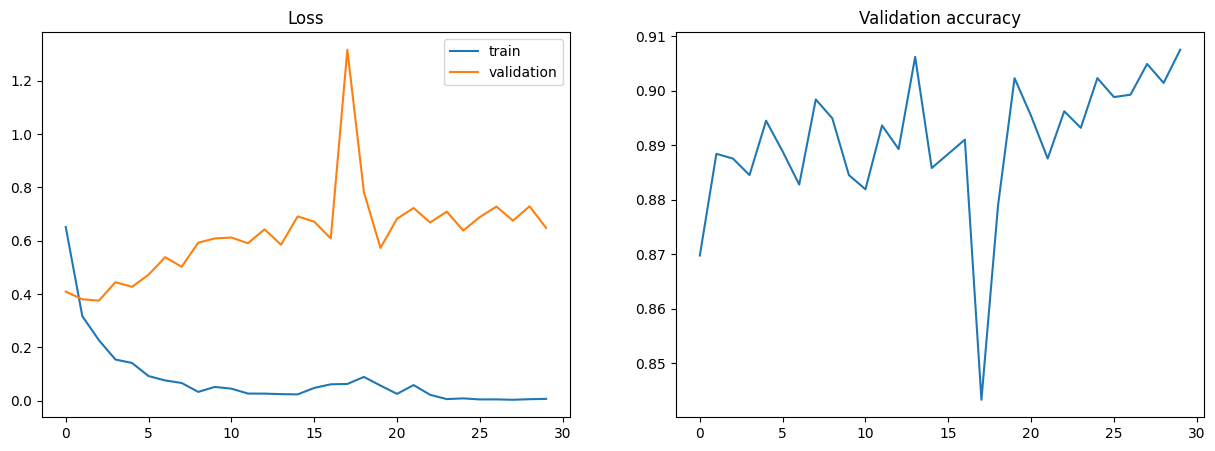

In [43]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Your turn
Try to add some additional transformations (e.g. random crop, rotation etc.) and train your model!

### Dropout try

In [44]:
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(200, 10),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [45]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

Epoch 1 of 30 took 0.594s
	  training loss: 1.250150
	validation loss: 0.482900
	validation accuracy: 0.849
Epoch 2 of 30 took 0.561s
	  training loss: 0.724247
	validation loss: 0.423798
	validation accuracy: 0.875
Epoch 3 of 30 took 0.571s
	  training loss: 0.618712
	validation loss: 0.402491
	validation accuracy: 0.885
Epoch 4 of 30 took 0.579s
	  training loss: 0.562336
	validation loss: 0.390203
	validation accuracy: 0.881
Epoch 5 of 30 took 0.548s
	  training loss: 0.514990
	validation loss: 0.389814
	validation accuracy: 0.886
Epoch 6 of 30 took 0.574s
	  training loss: 0.504848
	validation loss: 0.368980
	validation accuracy: 0.891
Epoch 7 of 30 took 0.549s
	  training loss: 0.473203
	validation loss: 0.362248
	validation accuracy: 0.898
Epoch 8 of 30 took 0.572s
	  training loss: 0.428297
	validation loss: 0.376783
	validation accuracy: 0.884
Epoch 9 of 30 took 0.567s
	  training loss: 0.403754
	validation loss: 0.392586
	validation accuracy: 0.884
Epoch 10 of 30 took 0.564s
	

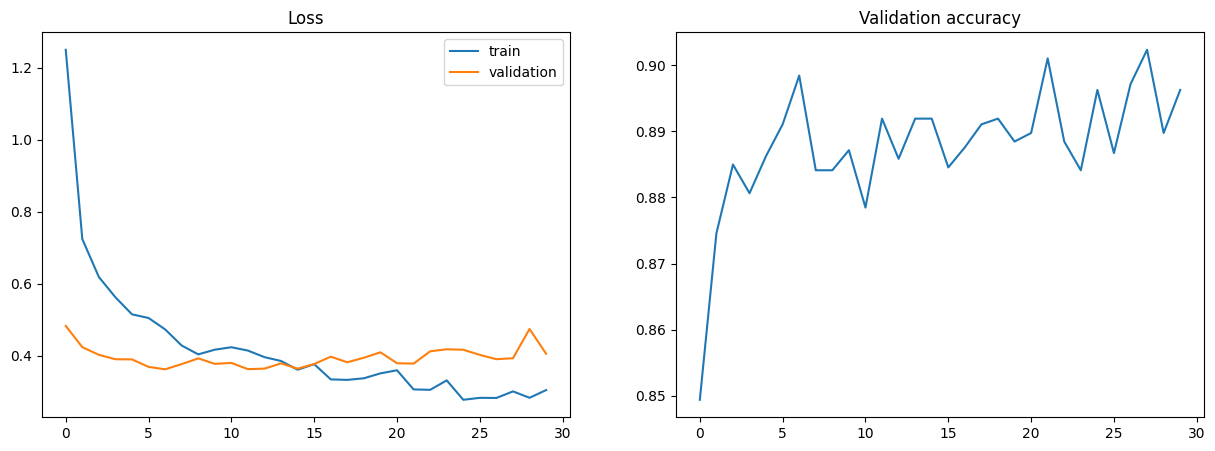

In [46]:
plot_train_process(train_loss, val_loss, val_accuracy)

### Batchnorm try

In [50]:
model = nn.Sequential(
    nn.BatchNorm1d(784),
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.BatchNorm1d(500),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 10),
    nn.BatchNorm1d(10),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [51]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

Epoch 1 of 30 took 0.744s
	  training loss: 0.876365
	validation loss: 0.583737
	validation accuracy: 0.873
Epoch 2 of 30 took 0.710s
	  training loss: 0.634580
	validation loss: 0.525635
	validation accuracy: 0.896
Epoch 3 of 30 took 0.705s
	  training loss: 0.542015
	validation loss: 0.495367
	validation accuracy: 0.891
Epoch 4 of 30 took 0.694s
	  training loss: 0.481380
	validation loss: 0.486858
	validation accuracy: 0.888
Epoch 5 of 30 took 0.712s
	  training loss: 0.452474
	validation loss: 0.465755
	validation accuracy: 0.891
Epoch 6 of 30 took 0.720s
	  training loss: 0.371180
	validation loss: 0.477662
	validation accuracy: 0.896
Epoch 7 of 30 took 0.680s
	  training loss: 0.315560
	validation loss: 0.437465
	validation accuracy: 0.901
Epoch 8 of 30 took 0.704s
	  training loss: 0.291746
	validation loss: 0.470375
	validation accuracy: 0.892
Epoch 9 of 30 took 0.707s
	  training loss: 0.271403
	validation loss: 0.431900
	validation accuracy: 0.900
Epoch 10 of 30 took 0.678s
	

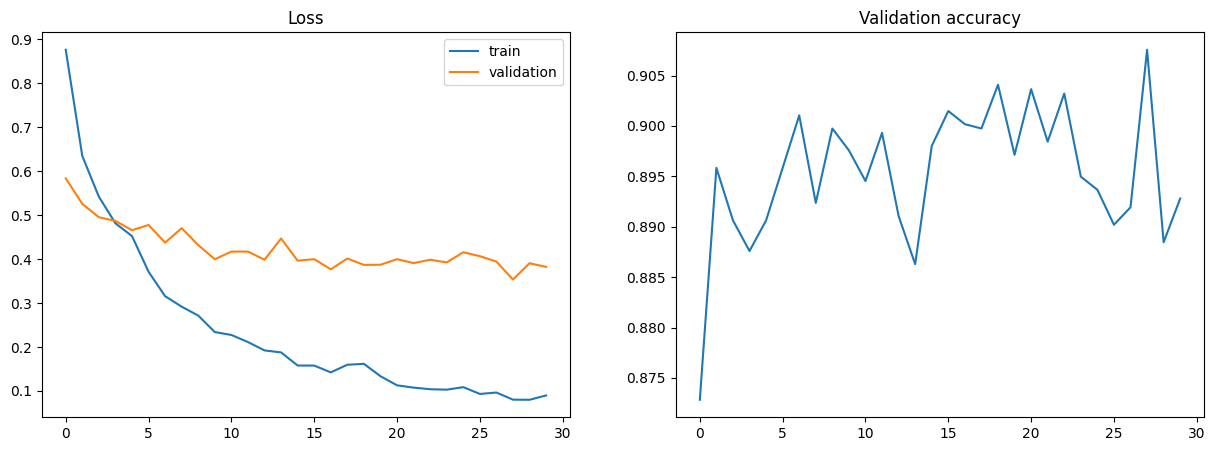

In [52]:
plot_train_process(train_loss, val_loss, val_accuracy)

### 3. Save the model (model checkpointing)

Now we have trained a model! Obviously we do not want to retrain the model everytime we want to use it. Plus if you are training a super big model, you probably want to save checkpoint periodically so that you can always fall back to the last checkpoint in case something bad happened or you simply want to test models at different training iterations.

Model checkpointing is fairly simple in PyTorch. First, we define a helper function that can save a model to the disk

In [ ]:
# torch.save(model.state_dict(), 'my_checkpoint.pth')

In [58]:
def save_checkpoint(checkpoint_path, model, optimizer):
    # state_dict: a Python dictionary object that:
    # - for a model, maps each layer to its parameter tensor;
    # - for an optimizer, contains info about the optimizer’s states and hyperparameters used.
    state = {
        'state_dict': model.state_dict(),
        'optimizer' : optimizer.state_dict()}
    torch.save(state, checkpoint_path)
    print('model saved to %s' % checkpoint_path)

def load_checkpoint(checkpoint_path, model, optimizer):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state['state_dict'])
    optimizer.load_state_dict(state['optimizer'])
    print('model loaded from %s' % checkpoint_path)

In [54]:
# create a brand new model
model2 = nn.Sequential(
    nn.BatchNorm1d(784),
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.BatchNorm1d(500),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 10),
    nn.BatchNorm1d(10),
)

model2 = model2.to(device)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

In [55]:

# Testing -- you should get a pretty poor performance since the model hasn't learned anything yet.

X_example, y_example = next(iter(train_loader))
X_example, y_example = X_example.to(device), y_example.to(device)

pred = model2(X_example)
y_pred = pred.max(1)[1].data
print(np.mean((y_example.cpu() == y_pred.cpu()).numpy()))

0.09375


#### Define a training loop with model checkpointing

In [59]:
def train_save(epoch, save_interval, log_interval=100):
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if iteration % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    ep, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
            # different from before: saving model checkpoints
            if iteration % save_interval == 0 and iteration > 0:
                save_checkpoint('mnist-%i.pth' % iteration, model, optimizer)
            iteration += 1


    # save the final model
    save_checkpoint('mnist-%i.pth' % iteration, model, optimizer)

In [60]:
train_save(5, save_interval=500, log_interval=100)

Train Epoch: 0 [0/2996 (0%)]	Loss: -5.921171
Train Epoch: 1 [192/2996 (6%)]	Loss: -5.835919
Train Epoch: 2 [384/2996 (13%)]	Loss: -5.408000
Train Epoch: 3 [576/2996 (19%)]	Loss: -5.541742
Train Epoch: 4 [768/2996 (26%)]	Loss: -5.507483
model saved to mnist-470.pth


In [61]:
!ls mnist*.pth

mnist-470.pth


In [66]:
# create a new model
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# load from the final checkpoint
load_checkpoint('mnist-470.pth', model, optimizer)
# should give you the final model accuracy


model loaded from mnist-470.pth


In [68]:
X_example, y_example = next(iter(val_loader))
X_example, y_example = X_example.to(device), y_example.to(device)

pred = model(X_example)
y_pred = pred.max(1)[1].data
print(np.mean((y_example.cpu() == y_pred.cpu()).numpy()))

0.96875


```

```

```

```

```

```

```

```

```

```
### More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)